In [11]:
from semra.sources import from_biomappings_positive, from_pyobo
from semra.api import (
    str_source_target_counts,
    project,
    infer_reversible,
    filter_prefixes,
    upgrade_dbxrefs,
    upgrade_mutual_dbxrefs,
    infer_chains,
    project,
)
import pandas as pd
import click
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from tqdm.auto import tqdm

In [ ]:
def project_unsafe(mappings, sp, op):
    return {(m.s.identifier, m.o.identifier) for m in mappings if m.s.prefix == sp and m.o.prefix == op}

In [9]:
biomappings_positive = from_biomappings_positive()
biomappings_positive = infer_reversible(biomappings_positive)

Loading biomappings:   0%|          | 0.00/9.67k [00:00<?, ?mapping/s]

Infer reverse:   0%|          | 0.00/9.05k [00:00<?, ?mapping/s]

In [4]:
umls = from_pyobo("umls", standardize=True)

INFO: [2023-05-08 12:05:06] semra.sources - loading mappings with PyOBO from umls


Loading umls:   0%|          | 0.00/2.33M [00:00<?, ?it/s]

In [8]:
print(str_source_target_counts(umls))
# fma, go, hgnc, hp, drugbank

Indexing mappings:   0%|          | 0.00/2.33M [00:00<?, ?mapping/s]

| source prefix   | target prefix   |   count |
|-----------------|-----------------|---------|
| umls            | mesh            |  460475 |
| umls            | snomedct        |  369832 |
| umls            | loinc           |  285406 |
| umls            | icd10pcs        |  191277 |
| umls            | ncit            |  183327 |
| umls            | omim            |  116761 |
| umls            | icd10cm         |  108397 |
| umls            | rxnorm          |  107564 |
| umls            | fma             |  104403 |
| umls            | go              |   68087 |
| umls            | mmsl            |   63330 |
| umls            | cpt             |   49470 |
| umls            | hgnc            |   43143 |
| umls            | nddf            |   34431 |
| umls            | vandf           |   30898 |
| umls            | icd9cm          |   22406 |
| umls            | hp              |   18409 |
| umls            | csp             |   18313 |
| umls            | icd10           |   

# HP Analysis

In [2]:
prefixes = ["umls", "mesh", "hp"]

In [5]:
hp_mappings = from_pyobo("hp")
hp_mappings = infer_reversible(hp_mappings)
hp_mappings = filter_prefixes(hp_mappings, prefixes)
hp_mappings = upgrade_mutual_dbxrefs(hp_mappings, prefixes)

print(str_source_target_counts(hp_mappings))

INFO: [2023-05-08 12:50:46] semra.sources - loading mappings with PyOBO from hp


Loading hp:   0%|          | 0.00/20.4k [00:00<?, ?it/s]

Infer reverse:   0%|          | 0.00/20.4k [00:00<?, ?mapping/s]

Keeping from 3 prefixes:   0%|          | 0.00/40.9k [00:00<?, ?mapping/s]

Mutating predicates:   0%|          | 0.00/30.3k [00:00<?, ?mapping/s]

Indexing mappings:   0%|          | 0.00/30.3k [00:00<?, ?mapping/s]

| source prefix   | target prefix   |   count |
|-----------------|-----------------|---------|
| hp              | umls            |   13001 |
| umls            | hp              |   13001 |
| hp              | mesh            |    2168 |
| mesh            | hp              |    2168 |


In [6]:
umls_mappings = filter_prefixes(umls, prefixes)
umls_mappings = upgrade_mutual_dbxrefs(umls_mappings, prefixes)
umls_mappings = infer_reversible(umls_mappings)
umls_mappings = infer_chains(umls_mappings)

print(str_source_target_counts(umls_mappings))

Keeping from 3 prefixes:   0%|          | 0.00/2.33M [00:00<?, ?mapping/s]

Mutating predicates:   0%|          | 0.00/479k [00:00<?, ?mapping/s]

Infer reverse:   0%|          | 0.00/479k [00:00<?, ?mapping/s]

Indexing mappings:   0%|          | 0.00/958k [00:00<?, ?mapping/s]

Unindexing mappings:   0%|          | 0.00/958k [00:00<?, ?mapping/s]

Inferring chains:   0%|          | 0.00/59.3k [00:00<?, ?component/s]

Indexing mappings:   0%|          | 0.00/1.53M [00:00<?, ?mapping/s]

| source prefix   | target prefix   |   count |
|-----------------|-----------------|---------|
| umls            | mesh            |  461187 |
| mesh            | umls            |  461132 |
| umls            | umls            |  272161 |
| umls            | hp              |   21331 |
| hp              | umls            |   21282 |
| mesh            | hp              |    1376 |
| hp              | mesh            |    1332 |
| hp              | hp              |     918 |
| mesh            | mesh            |     183 |


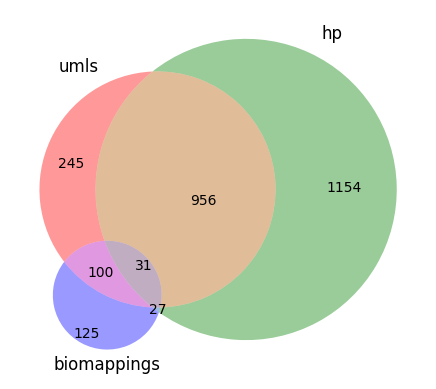

In [7]:
venn3(
    (
        project_unsafe(umls_mappings, "hp", "mesh"),
        project_unsafe(hp_mappings, "hp", "mesh"),
        project_unsafe(biomappings_positive, "hp", "mesh"),
    ),
    set_labels=("umls", "hp", "biomappings"),
)

# GO Analysis

In [ ]:
prefixes = ["umls", "mesh", "go"]

go_mappings = from_pyobo("go")
go_mappings = infer_reversible(go_mappings)
go_mappings = filter_prefixes(go_mappings, prefixes)
go_mappings = upgrade_mutual_dbxrefs(go_mappings, go_mappings)

go_umls_mappings = filter_prefixes(umls, prefixes)
go_umls_mappings = upgrade_mutual_dbxrefs(go_umls_mappings, prefixes)
go_umls_mappings = infer_reversible(go_umls_mappings)
go_umls_mappings = infer_chains(go_umls_mappings)

INFO: [2023-05-08 13:10:53] semra.sources - loading mappings with PyOBO from go
INFO: [2023-05-08 13:10:53] pyobo.api.xrefs - [go] no cached xrefs found. getting from OBO loader
INFO: [2023-05-08 13:10:53] pystow.utils - downloading with urllib from http://purl.obolibrary.org/obo/go.obo to /Users/cthoyt/.data/pyobo/raw/go/2023-04-01/go.obo


INFO: [2023-05-08 13:10:58] pyobo.reader - [go] parsing with obonet from /Users/cthoyt/.data/pyobo/raw/go/2023-04-01/go.obo


[go] parsing obo: 0.00it [00:00, ?it/s]

INFO: [2023-05-08 13:11:04] pyobo.reader - [go] extracting OBO using obonet
INFO: [2023-05-08 13:11:04] pyobo.reader - [go] does not report a date
INFO: [2023-05-08 13:11:04] pyobo.reader - [go] using version 2023-04-01
INFO: [2023-05-08 13:11:16] pyobo.reader - [go] got 43,093 references, 10 typedefs, 43,093 terms, 3,482 alt ids, 68,894 parents, 117,214 synonyms, 25,604 xrefs, 18,112 relations, and 3,435 properties


Loading go:   0%|          | 0.00/25.6k [00:00<?, ?it/s]

Infer reverse:   0%|          | 0.00/25.6k [00:00<?, ?mapping/s]

Keeping from 3 prefixes:   0%|          | 0.00/51.2k [00:00<?, ?mapping/s]

Mutating predicates: 0.00mapping [00:00, ?mapping/s]

Keeping from 3 prefixes:   0%|          | 0.00/2.33M [00:00<?, ?mapping/s]

Mutating predicates:   0%|          | 0.00/529k [00:00<?, ?mapping/s]

Infer reverse:   0%|          | 0.00/529k [00:00<?, ?mapping/s]

Indexing mappings:   0%|          | 0.00/1.06M [00:00<?, ?mapping/s]

Unindexing mappings:   0%|          | 0.00/1.06M [00:00<?, ?mapping/s]

Inferring chains:   0%|          | 0.00/67.8k [00:00<?, ?component/s]

/Users/cthoyt/.virtualenvs/indra/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


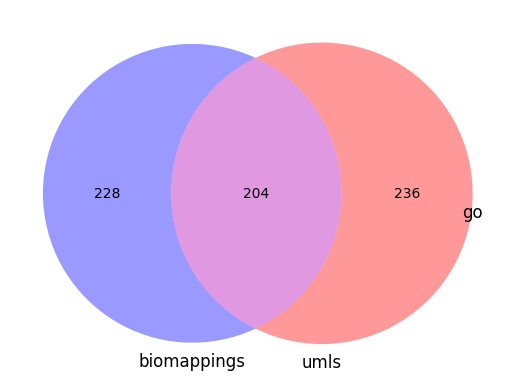

In [10]:
venn3(
    (
        project_unsafe(go_umls_mappings, "go", "mesh"),
        project_unsafe(go_mappings, "go", "mesh"),
        project_unsafe(biomappings_positive, "go", "mesh"),
    ),
    set_labels=("umls", "go", "biomappings"),
)

In [13]:
efo_mappings = from_pyobo("efo")

INFO: [2023-05-08 15:16:18] semra.sources - loading mappings with PyOBO from efo


Loading efo:   0%|          | 0.00/29.3k [00:00<?, ?it/s]

In [19]:
for m in efo_mappings:
    if m.s.identifier == "1000748":
        print(m.o.curie)

doid:3927
gard:0007350
mesh:C535549
mondo:0006593
ncit:C27486
umls:C0406608
